##  Ingeniería de características
### Exploración de datos

---------------------------------

##### Desarrollado por Michelle Mejía y Silvia Illescas

In [43]:
import pandas as pd

df = pd.read_csv("Dataset/dataset_pishing.csv")
df.head()


,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [44]:
conteo = df['status'].value_counts()

print("Distribución de clases:")
print(conteo)


Distribución de clases:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


In [45]:
porcentaje = df['status'].value_counts(normalize=True) * 100

print("\nDistribución porcentual:")
print(porcentaje)



Distribución porcentual:
status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64


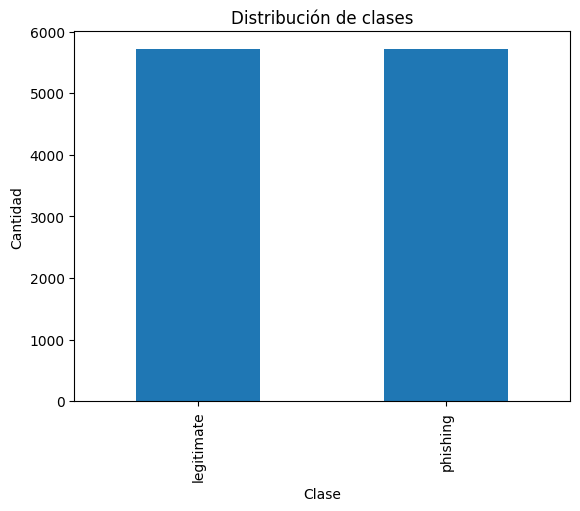

In [46]:
import matplotlib.pyplot as plt

df['status'].value_counts().plot(kind='bar')
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


## Funciones de Ingeniería de Características basadas en URL

In [47]:
import re
import math
from urllib.parse import urlparse
from collections import Counter


###  Longitud total de la URL

In [48]:
def url_length(url):
    return len(url)


### Número de puntos (.)

In [49]:
def count_dots(url):
    return url.count('.')


### Número de guiones (-)

In [50]:
def count_hyphens(url):
    return url.count('-')


### Número de subdominios

In [51]:
def count_subdomains(url):
    domain = urlparse(url).netloc
    return domain.count('.') - 1 if domain.count('.') > 1 else 0


### Presencia de dirección IP en vez de dominio

In [52]:
def has_ip(url):
    domain = urlparse(url).netloc
    pattern = r'^\d{1,3}(\.\d{1,3}){3}$'
    return 1 if re.match(pattern, domain) else 0


### Longitud del dominio

In [53]:
def domain_length(url):
    return len(urlparse(url).netloc)


### Número de caracteres especiales

In [54]:
def count_special_chars(url):
    return len(re.findall(r'[^a-zA-Z0-9]', url))


### Número de dígitos

In [55]:
def count_digits(url):
    return sum(c.isdigit() for c in url)


### Ratio dígitos / longitud

In [56]:
def digit_ratio(url):
    return count_digits(url) / len(url) if len(url) > 0 else 0


### Presencia de HTTPS

In [57]:
def has_https(url):
    return 1 if url.startswith("https") else 0


### Número de parámetros (? y =)

In [58]:
def count_parameters(url):
    return url.count('?') + url.count('=')


### Número de barras (/) después del dominio

In [59]:
def count_slashes(url):
    path = urlparse(url).path
    return path.count('/')


### Entropía de Shannon (Shannon Entropy)

In [60]:
def shannon_entropy(url):
    prob = [float(url.count(c)) / len(url) for c in dict.fromkeys(list(url))]
    return -sum([p * math.log2(p) for p in prob if p > 0])


### Entropía relativa (respecto a distribución uniforme)

In [61]:
def relative_entropy(url):
    freq = Counter(url)
    total = len(url)
    probs = [count / total for count in freq.values()]
    
    uniform_prob = 1 / len(freq) if len(freq) > 0 else 0
    
    kl_div = 0
    for p in probs:
        if p > 0 and uniform_prob > 0:
            kl_div += p * math.log2(p / uniform_prob)
    
    return kl_div


### Entropía de caracteres no alfanuméricos (basado en Aung & Yamana)

In [62]:
def nan_entropy(url):
    nan_chars = re.findall(r'[^a-zA-Z0-9]', url)
    if len(nan_chars) == 0:
        return 0
    
    freq = Counter(nan_chars)
    total = len(nan_chars)
    probs = [count / total for count in freq.values()]
    
    return -sum(p * math.log2(p) for p in probs if p > 0)


#### Agregarlas al dataset

In [63]:
df['url_length'] = df['url'].apply(url_length)
df['dot_count'] = df['url'].apply(count_dots)
df['hyphen_count'] = df['url'].apply(count_hyphens)
df['subdomain_count'] = df['url'].apply(count_subdomains)
df['has_ip'] = df['url'].apply(has_ip)
df['domain_length'] = df['url'].apply(domain_length)
df['special_char_count'] = df['url'].apply(count_special_chars)
df['digit_count'] = df['url'].apply(count_digits)
df['digit_ratio'] = df['url'].apply(digit_ratio)
df['has_https'] = df['url'].apply(has_https)
df['parameter_count'] = df['url'].apply(count_parameters)
df['slash_count'] = df['url'].apply(count_slashes)
df['shannon_entropy'] = df['url'].apply(shannon_entropy)
df['relative_entropy'] = df['url'].apply(relative_entropy)
df['nan_entropy'] = df['url'].apply(nan_entropy)


In [64]:
df.head()

,url,status,url_length,dot_count,hyphen_count,subdomain_count,has_ip,domain_length,special_char_count,digit_count,digit_ratio,has_https,parameter_count,slash_count,shannon_entropy,relative_entropy,nan_entropy
0,http://www.crestonwood.com/router.php,legitimate,37,3,0,1,0,19,7,0,0.000000,0,0,1,3.787043,0.212957,1.448816
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,1,0,0,0,23,7,17,0.220779,0,0,3,4.419864,0.438117,1.148835
2,https://support-appleld.com.secureupdate.duila...,phishing,126,4,1,3,0,50,19,19,0.150794,1,4,3,4.753412,0.290982,2.755058
3,http://rgipt.ac.in,legitimate,18,2,0,1,0,11,5,0,0.000000,0,0,0,3.461320,0.123642,1.521928
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,2,2,1,0,15,10,0,0.000000,0,0,3,4.097662,0.224266,1.760964


### Preprocesamiento

In [65]:
import numpy as np
import pandas as pd

# Normalizar texto
df['status'] = df['status'].astype(str).str.strip().str.lower()

# A prueba de typos
map_status = {
    'legit': 0,
    'legitimate': 0,
    'phishing': 1,
    'pishing': 1
}

df['status_bin'] = df['status'].map(map_status)

# Verificar si quedó algún valor sin mapear
if df['status_bin'].isna().any():
    print("Valores no reconocidos en 'status':", df.loc[df['status_bin'].isna(), 'status'].unique())


In [66]:
df.head() #status_bin: 1 si es phishing, 0 si es legítimo

,url,status,url_length,dot_count,hyphen_count,subdomain_count,has_ip,domain_length,special_char_count,digit_count,digit_ratio,has_https,parameter_count,slash_count,shannon_entropy,relative_entropy,nan_entropy,status_bin
0,http://www.crestonwood.com/router.php,legitimate,37,3,0,1,0,19,7,0,0.000000,0,0,1,3.787043,0.212957,1.448816,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,1,0,0,0,23,7,17,0.220779,0,0,3,4.419864,0.438117,1.148835,1
2,https://support-appleld.com.secureupdate.duila...,phishing,126,4,1,3,0,50,19,19,0.150794,1,4,3,4.753412,0.290982,2.755058,1
3,http://rgipt.ac.in,legitimate,18,2,0,1,0,11,5,0,0.000000,0,0,0,3.461320,0.123642,1.521928,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,2,2,1,0,15,10,0,0.000000,0,0,3,4.097662,0.224266,1.760964,0


In [67]:
import numpy as np

# Target
y = df['status_bin'].astype(int)

# Features: eliminar columnas no numéricas crudas
X = df.drop(columns=['url', 'status', 'status_bin'], errors='ignore')

# Verificar tipos
print(X.dtypes)

# Convertir por seguridad a numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Reemplazar infinitos por NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Imputar posibles NaN con mediana
X = X.fillna(X.median())

print("\nDataset listo para ML")
print("X shape:", X.shape)
print("y shape:", y.shape)


url_length              int64
dot_count               int64
hyphen_count            int64
subdomain_count         int64
has_ip                  int64
domain_length           int64
special_char_count      int64
digit_count             int64
digit_ratio           float64
has_https               int64
parameter_count         int64
slash_count             int64
shannon_entropy       float64
relative_entropy      float64
nan_entropy           float64
dtype: object

Dataset listo para ML
X shape: (11430, 15)
y shape: (11430,)


### Selección de características

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1) Unir X y y en un solo DataFrame
data = X.copy()
data['status'] = y.values  # o y si ya es Series alineada

print("Antes de duplicados:", data.shape)

# 2) Eliminar duplicados (sobre features + target)
data = data.drop_duplicates()

print("Después de duplicados:", data.shape)

# 3) Separar de nuevo
X_clean = data.drop(columns=['status'])
y_clean = data['status'].astype(int)

print("X_clean:", X_clean.shape, "y_clean:", y_clean.shape)


Antes de duplicados: (11430, 16)
Después de duplicados: (10914, 16)
X_clean: (10914, 15) y_clean: (10914,)


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unimos X y y para calcular correlación
data_corr = X.copy()
data_corr['status'] = y

corr = data_corr.corr()

# Correlación con la variable objetivo
corr_target = corr['status'].abs().sort_values(ascending=False)

print(corr_target)


status                1.000000
digit_ratio           0.356421
shannon_entropy       0.336562
parameter_count       0.263939
url_length            0.248482
digit_count           0.240425
domain_length         0.238516
slash_count           0.235889
relative_entropy      0.229560
dot_count             0.206965
special_char_count    0.197068
nan_entropy           0.150592
has_https             0.114669
subdomain_count       0.102622
hyphen_count          0.100107
has_ip                0.092033
Name: status, dtype: float64


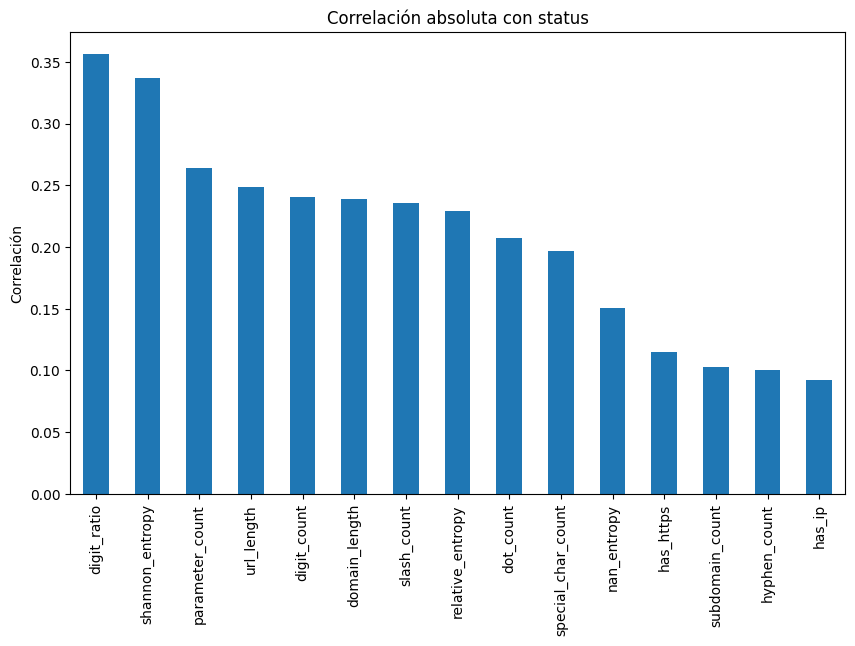

In [70]:
plt.figure(figsize=(10,6))
corr_target.drop('status').plot(kind='bar')
plt.title("Correlación absoluta con status")
plt.ylabel("Correlación")
plt.show()


In [71]:
corr_matrix = X.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Columnas altamente correlacionadas:", high_corr_cols)

X = X.drop(columns=high_corr_cols)


Columnas altamente correlacionadas: []


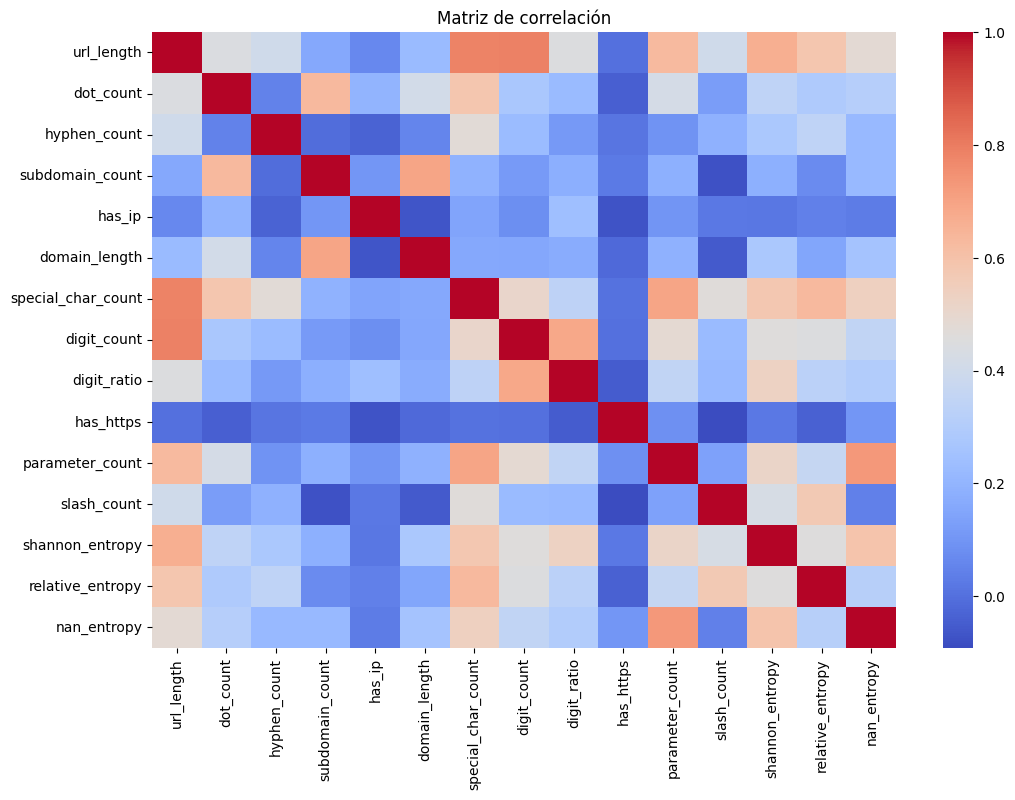

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


### Separacón de datos

In [73]:
from sklearn.model_selection import train_test_split

# X y y ya los tienes del preprocesamiento
# X -> features
# y -> target

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.45,      # 45% restante
    stratify=y,          # mantiene balance de clases
    random_state=42
)


In [74]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.6667,     # 30% final
    stratify=y_temp,
    random_state=42
)


In [75]:
print("Train:", X_train.shape[0])
print("Validation:", X_val.shape[0])
print("Test:", X_test.shape[0])

print("\nProporciones:")
print("Train %:", X_train.shape[0] / X.shape[0])
print("Validation %:", X_val.shape[0] / X.shape[0])
print("Test %:", X_test.shape[0] / X.shape[0])


Train: 6286
Validation: 1714
Test: 3430

Proporciones:
Train %: 0.5499562554680665
Validation %: 0.14995625546806648
Test %: 0.300087489063867


In [76]:
# Reunir features y target para guardar completos
train_df = X_train.copy()
train_df['status'] = y_train

val_df = X_val.copy()
val_df['status'] = y_val

test_df = X_test.copy()
test_df['status'] = y_test

# Guardar
train_df.to_csv("train_dataset.csv", index=False)
val_df.to_csv("validation_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)


## MODELO 1 – Logistic Regression

Entrenamiento

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Evaluación en VALIDACIÓN

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_lr = lr.predict(X_val)
y_val_prob_lr = lr.predict_proba(X_val)[:,1]

print("Matriz de confusión - Validación (LR)")
print(confusion_matrix(y_val, y_val_pred_lr))

print("\nReporte clasificación - Validación (LR)")
print(classification_report(y_val, y_val_pred_lr))


Matriz de confusión - Validación (LR)
[[688 169]
 [259 598]]

Reporte clasificación - Validación (LR)
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       857
           1       0.78      0.70      0.74       857

    accuracy                           0.75      1714
   macro avg       0.75      0.75      0.75      1714
weighted avg       0.75      0.75      0.75      1714



Curva ROC y AUC

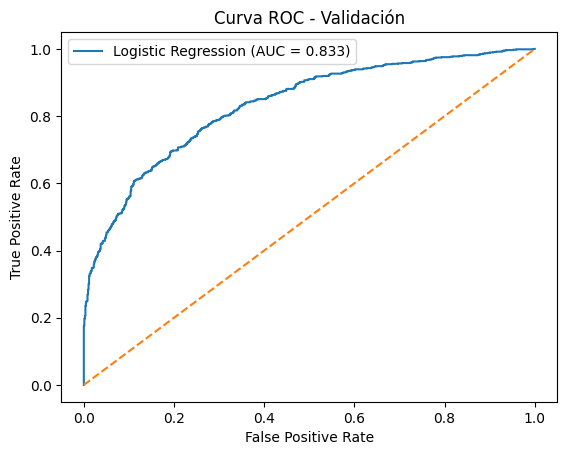

In [79]:
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Validación")
plt.legend()
plt.show()


## MODELO 2 – Random Forest

Entrenamiento

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Evaluación en VALIDACIÓN

In [81]:
y_val_pred_rf = rf.predict(X_val)
y_val_prob_rf = rf.predict_proba(X_val)[:,1]

print("Matriz de confusión - Validación (RF)")
print(confusion_matrix(y_val, y_val_pred_rf))

print("\nReporte clasificación - Validación (RF)")
print(classification_report(y_val, y_val_pred_rf))


Matriz de confusión - Validación (RF)
[[712 145]
 [121 736]]

Reporte clasificación - Validación (RF)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       857
           1       0.84      0.86      0.85       857

    accuracy                           0.84      1714
   macro avg       0.85      0.84      0.84      1714
weighted avg       0.85      0.84      0.84      1714



Curva ROC y AUC

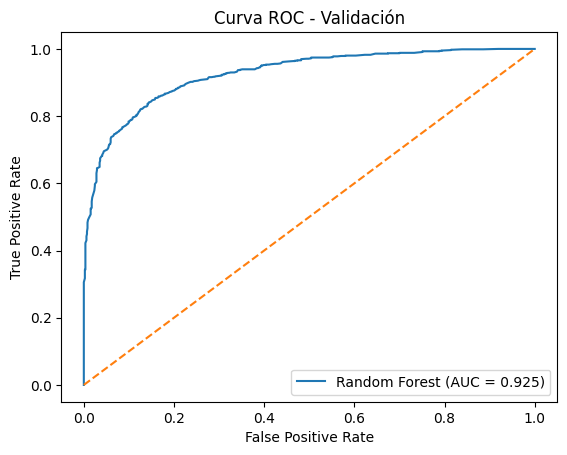

In [82]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Validación")
plt.legend()
plt.show()


Evaluación final en TEST (Random Forest)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Predicciones
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]

# 🔹 Matriz de confusión
print("Matriz de confusión - TEST")
print(confusion_matrix(y_test, y_test_pred))

# 🔹 Precision, Recall, F1
print("\nReporte clasificación - TEST")
print(classification_report(y_test, y_test_pred))


Matriz de confusión - TEST
[[1420  295]
 [ 283 1432]]

Reporte clasificación - TEST
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1715
           1       0.83      0.83      0.83      1715

    accuracy                           0.83      3430
   macro avg       0.83      0.83      0.83      3430
weighted avg       0.83      0.83      0.83      3430



Curva ROC y AUC en TEST

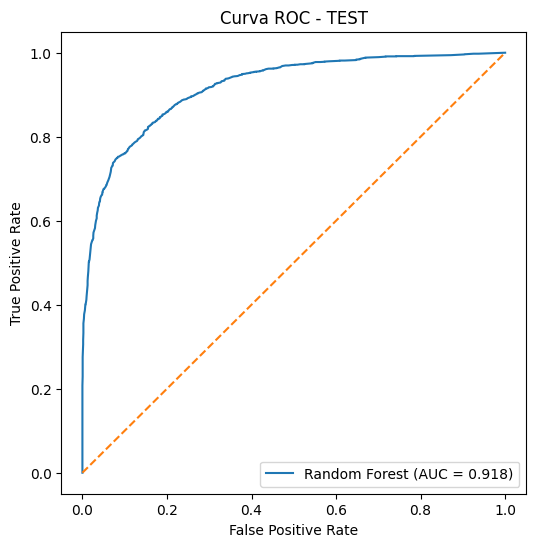

AUC en TEST: 0.9182775884197911


In [84]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - TEST")
plt.legend()
plt.show()

print("AUC en TEST:", roc_auc)
